#  Probability with a Montecarlo view

## Stochastic vs deterministic numbers

The word stochastic is an adjective in English that describes something that was randomly determined.

Randomness is the lack of pattern or predictability in events. A random sequence of events thereofore has no order and does not follow an intelligible combination.

Individual random events are by definition unpredictable, but in many cases the frequency of different outcomes over a large number of events is predictable.
And this is what is interesting for us: if I throw a die with six faces thousands of times, how many times in percent shall I expect to see the face number six?

We generate a (pseudo) random number in Python using the random library:

In [1]:
import random

In [2]:
def genEven():
    '''
    Returns a random even number x, where 0 <= x < 100
    '''
    return random.randrange(0,100,2)

In [3]:
genEven()

2

In [4]:
def stochasticNumber():
    '''
    Stochastically generates and returns a uniformly distributed even 
    number between 9 and 21
    '''
    return random.randrange(10,21,2)

In [5]:
stochasticNumber()

14

Again:

In [6]:
stochasticNumber()

12

On the other side, deterministic means that the outcome - given the same input - will always be the same. There is no unpredictability.

Generally, in applications such as in security applications, hardware generators are generally preferred over software algorithm. 

A pseudo-random algorithms, like the Python random library above, is called pseudo because is not really unpredictable: the sequence of random numbers generated depends on the initial seed: using the same number as seed will generate the same sequence. 

This is very useful for debugging purpose but means also that one needs to be very careful when choosing the seed (for example, choosing atmospheric signals or other noises). 

In [7]:
def deterministicNumber():
    '''
    Deterministically generates and returns an even number 
    between 9 and 21
    '''
    random.seed(0)  # Fixed seed, always the same.
    return random.randrange(10,21,2)

In [8]:
deterministicNumber()

16

And again:

In [9]:
deterministicNumber()

16

The same number !!

Before looking at what is the probability of an event, we define a function that simulates the roll of a six-faced die:

In [10]:
def rollDie():
    """returns a random int between 1 and 6"""
    #return random.choice([1,2,3,4,5,6])
    return random.randint(1,6)

In [11]:
rollDie()

4

# Discrete probability

If E represents an event, then P(E) is the probability that E will occur.

## Naive definition of probability
If all outcomes are equally likely, the probability of an event A happening is:  

P(E) = number of outcomes favourable to E / total number of outcomes.  

By definition, P is always between 0 (no favourable outcomes) and 1 (all favourable outcomes).

Example: a die has six faces therefore the space of the possibilities is six (total number of possible outcomes).

If I want to calculate the probability of getting the event 6 when rolling the die one time, I need to consider that there is one face with six therefore only one possible outcome favourable:

P(6) = 1 / 6

This is the frequentist definition.  
Probability can be seen as the *long-run relative frequency* with which an event occurred given many repeated trials.  
Empirically, let's say I throw this die 1000 times and the face number six comes 125 times.  
The frequency observed and *measured* for face six is 125/1000 = 0.125, so I can define the probability to get six = 0.125 = 1/6.

An alternative is Bayesianism which defines probability as a degree of belief that an event will occur. It depends on the own state of knowledge or on evidence at hand, therefore is more subjective than frequency probability.

By the way, the probability that an event does NOT occur is:  
P(not A) = 1 - P(A)  

Probability NOT to get a three in a die roll is therefore 1 - 1/6 = 5/6

## Montecarlo simulation for die goal

The term Monte Carlo simulation was coined in 1949 by Stanislav Ulam and Nicholas Metropolis, two mathematicians, in homage to the casino of  Monaco.  
Monte Carlo methods are a class of methods that can be applied to computationally ‘difficult’ problems to arrive at near-enough accurate answers. The general premise is remarkably simple:

- Randomly sample input(s) to the problem
- For each sample, compute an output
- Aggregate the outputs to approximate the solution

We run now a simulation of a die roll and see what are the frequencies for each face of the die:

In [12]:
def simMCdie(numTrials):
    print ("Running ", numTrials)
    counters = [0] * 6 # initialize the counters for each face
    for i in range(numTrials):
        roll = rollDie()
        counters[roll-1] += 1
        
    return counters

In [13]:
import matplotlib.pyplot as plt

In [14]:
results = simMCdie(10000)

Running  10000


In [15]:
results

[1657, 1690, 1697, 1655, 1632, 1669]

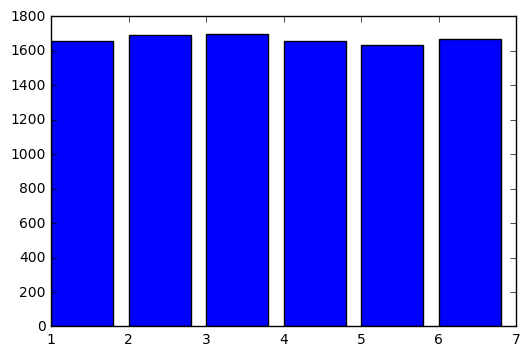

In [16]:
plt.bar(['1','2','3','4','5','6'], results);

# Independent events
A and B are independent if knowing whether A occurred gives no information about whether B occurred.

Let's define a function to model *n* rolls of a die, whereas each roll should be independent form the others.

In [17]:
def rollNdice(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    return result

In [18]:
rollNdice(5)

'12344'

These are indipendent events.  
Now an interesting question would be:  
What is the probability that both two independent events A and B occur?

P(A and B) = P(A) * P(B) 

For example, the probability to get TWO consecutive six in a die roll is therefore:  
1/6 * 1/6 = 1 / (6^2) = 1 / 36  
  
Which is quite low.

This applies also for more than two independent evemts.  
In general, the probabilities to occur *n* indepenet events is:  

$ P(\forall E_i) = \prod (E_i) $ 

For a six-sided die, there are 6^5 possible sequences of length five.  
The probability of getting five consecutives six is 1 / 6^5, pretty low number. 1 out of 7776 possibilities.  
Let's look at a simulation to check this.

In [19]:
def getTarget(goal):
    # Roll dice until we get the goal
    # goal: a string of N die results, for example 5 six: "66666"
    numRolls = len(goal)
    
    numTries = 0
    while True:
        numTries += 1
        result = rollNdice(numRolls)
          # if success then exit
        if result == goal:
            return numTries

In [20]:
def runDiceMC(goal, numTrials):
    print ("Running ... trails: ", numTrials)
    total = 0
    for i in range(numTrials):
        total += getTarget(goal)
        
    print ('Average number of tries =', total/float(numTrials))

In [21]:
runDiceMC('66666', 100)

Running ... trails:  100
Average number of tries = 6596.93


Remember that the theory says it will take on average 7776 tries.

## Pascal's problem
A friend asked Pascal:  
would it be profitable, given 24 rolls of a pair of dice, to bet against their being at least one double six?  
In 17th century this was a hard problem.  
Now we know it's :  
P(A=6 and B=6) = 1/6 * 1/6 = 1/36 (two independent events)  
P(not double six) = 1 - 1/36 = 35/36  
P(no double six in 24 rolls) = (35/36)^24

In [22]:
(35.0 / 36.0)**24

0.5085961238690966

it's very close!  
Again, we can run a simulation to check it:

In [23]:
def checkPascalMC(numTrials, roll, numRolls = 24, goal = 6):
    numSuccess = 0.0
    
    for i in range(numTrials):
        for j in range(numRolls):
            die1 = roll()
            die2 = roll()
            if die1 == goal and die2 == goal:
                numSuccess += 1
                break
                
    print ('Probability of losing =', 1.0 - numSuccess / numTrials)

In [24]:
checkPascalMC(10000, rollDie)

Probability of losing = 0.5063


In the function above, I am passing the function to roll a die as a parameter to show what can happen if the die has not the same faces but the face number six has a higher probability:  

In [25]:
def rollLoadedDie():
    if random.random() < 1.0/5.5:
        return 6
    else:
        return random.choice([1,2,3,4,5])

In [26]:
checkPascalMC(10000, rollLoadedDie)

Probability of losing = 0.44589999999999996


A last one.  
What's the probability to get at least one die showing *one* when rolled ten times?

In [27]:
def atLeastOneOne(numRolls, numTrials):
    numSuccess = 0
    
    for i in range(numTrials):
        rolls = rollNdice(numRolls)
        if '1' in rolls:
            numSuccess += 1
    fracSuccess = numSuccess/float(numTrials)
    print (fracSuccess) #?!

atLeastOneOne(10, 1000)

0.832


# Sampling table

The sampling table gives the number of possible samples of size *k* out of a population of size *n*, under various assumptions how the sample is collected.

One example:  
one ball will be drawn at random from a box containing: 3 green balls, 5 red balls, and 7 yellow balls.

What is the probability that the ball will be green?

In [28]:
green = 3
red = 5
yellow = 7
balls = green+red+yellow
pGreen = green / balls
pGreen

0.2

The population has size *15* and has therefore 15 possible samples of size *1*; out of these 15 possible samples, only 3 of them will answer our question (ball is green).

We defined the variable pGreen as the probability of choosing a green ball from the box.
What is the probability that the ball you draw from the box will NOT be green?

In [29]:
1 - pGreen

0.8

## Sampling without replacement - generalized
Instead of taking just one draw, consider taking two draws. You take the second draw without returning the first draw to the box. We call this **sampling without replacement**.

What is the probability that the first draw is green and that the second draw is not green?

In [30]:
# probability of choosing a green ball from the box on the first draw.
pGreen1 = green / balls
# probability of NOT choosing a green ball on the second draw without replacement.
pGreen2 = (red + yellow) / (green -1 + red + yellow)

# Calculate the probability that the first draw is green and the second draw is not green.
pGreen1 * pGreen2

0.17142857142857143

## Sampling with replacement - generalized
Now repeat the experiment, but this time, after taking the first draw and recording the color, return it back to the box and shake the box. We call this **sampling with replacement**.

What is the probability that the first draw is green and that the second draw is not green?

In [31]:
# probability of choosing a green ball from the box on the first draw.
# same as above: pGreen1
# probability of NOT choosing a green ball on the second draw with replacement

pGreen2r = (red + yellow) / balls


# Calculate the probability that the first draw is cyan and the second draw is not cyan.
pGreen1 * pGreen2r

0.16000000000000003

### Sampling with replacement - be careful
Say you’ve drawn 5 balls from a box that has 3 green balls, 5 red balls, and 7 yellow balls - with replacement - and all have been yellow.

What is the probability that the next one is yellow?

In [32]:
# probability that a yellow ball is drawn from the box.
pYellow = yellow / balls

# probability of drawing a yellow ball on the sixth draw.
pYellow

0.4666666666666667

Yes, doesn't matter if all previous five draws were ALL yellow balls, the probability that the sixth ball is yellow **is the same** as for the first draw and all other draws.  With replacement the population is always the same.

## A football match

Two teams, say the Manchester United (M.Utd.) and the AC Milan, are playing a seven game series. The Milan are a better team and have a 60% chance of winning each game.

What is the probability that the M.Utd. wins at least one game? Remember that they must win one of the first four games, or the series will be over!  
Let´s assume they are independent events (in reality losing one match may impact the team's morale for the next match):

In [33]:
p_milan_wins = 0.6
# probability that the Milan team will win the first four games of the series:
p_milan_win4 = p_milan_wins**4

# probability that the M.Utd. wins at least one game in the first four games of the series.
1 - p_milan_win4


0.8704000000000001

Here is the Monte Carlo simulation to confirm our answer to M.Utd. winning a game. 

In [34]:
import numpy as np

In [35]:
def RealWinsOneMC(numTrials, nGames=4):
    numSuccess = 0
    
    for i in range(numTrials):
        simulatedGames = np.random.choice(["lose","win"], size=nGames, replace=True, p=[0.6,0.4])
        if 'win' in simulatedGames:
            numSuccess += 1
            
    return numSuccess / numTrials

In [36]:
print (RealWinsOneMC(1000))

0.856


## Winning a game - with MonteCarlo

The two teams are playing a seven game championship series. The first to win four games wins the series. The teams are equally good, so they each have a 50-50 chance of winning each game.

If Milan lose the first game, what is the probability that they win the series?

In [37]:
# Create a list that contains all possible outcomes for the remaining games.
possibilities = [(g1,g2,g3,g4,g5,g6) for g1 in range(2) for g2 in range(2)
                 for g3 in range(2) for g4 in range(2) for g5 in range(2)
                 for g6 in range(2)]

# Create a list that indicates whether each row in 'possibilities' 
# contains enough wins for the Cavs to win the series.
sums = [sum(tup) for tup in possibilities]
results = [s >= 4 for s in sums]

# Calculate the proportion of 'results' in which the Cavs win the series. 
np.mean(results)

0.34375

Confirm the results of the previous question with a Monte Carlo simulation to estimate the probability of Milan winning the series.

In [38]:
def MilanWinsSeriesMC(numTrials, nGames=6):
    numSuccess = 0
    
    for i in range(numTrials):
        simulatedGames = np.random.choice([0,1], size=nGames, replace=True)
        if sum(simulatedGames) >= 4:
            numSuccess += 1
            
    return numSuccess / numTrials

In [39]:
MilanWinsSeriesMC(100)

0.36

## A and B play a series

In [40]:
def noReplacementSimulation(numTrials):
    '''
    Runs numTrials trials of a Monte Carlo simulation
    of drawing 3 balls out of a bucket containing
    3 red and 3 green balls. Balls are not replaced once
    drawn. Returns the a decimal - the fraction of times 3 
    balls of the same color were drawn.
    '''
    sameColor = 0
    for i in range(numTrials):
        red = 3.0
        green = 3.0
        for j in range(3):
            if random.random() < red / (red + green):
                #  this is red
                red -= 1
            else:
                green -= 1
        if red == 0 or green == 0:
            sameColor += 1
            
    return float(sameColor) / numTrials

In [41]:
noReplacementSimulation(100)

0.12

In [42]:
def oneTrial():
    '''
    Simulates one trial of drawing 3 balls out of a bucket containing
    3 red and 3 green balls. Balls are not replaced once
    drawn. Returns True if all three balls are the same color,
    False otherwise.
    '''
    balls = ['r', 'r', 'r', 'g', 'g', 'g']
    chosenBalls = []
    for t in range(3):
        # For three trials, pick a ball
        ball = random.choice(balls)
        # Remove the chosen ball from the set of balls
        balls.remove(ball)
        # and add it to a list of balls we picked
        chosenBalls.append(ball)
    # If the first ball is the same as the second AND the second is the same as the third,
    #  we know all three must be the same color.
    if chosenBalls[0] == chosenBalls[1] and chosenBalls[1] == chosenBalls[2]:
        return True
    return False

In [43]:
oneTrial()

False

In [44]:
def noReplacementSimulationProfessor(numTrials):
    '''
    Runs numTrials trials of a Monte Carlo simulation
    of drawing 3 balls out of a bucket containing
    3 red and 3 green balls. Balls are not replaced once
    drawn. Returns the a decimal - the fraction of times 3 
    balls of the same color were drawn.
    '''
    numTrue = 0
    for trial in range(numTrials):
        if oneTrial():
            numTrue += 1

    return float(numTrue)/float(numTrials)

In [45]:
noReplacementSimulationProfessor(100)

0.12

Write a function called sampleQuizzes() that implements a Monte Carlo simulation
 that estimates the probability of a student having a final score >= 70 and <= 75. 
 Assume that 10,000 trials are sufficient to provide an accurate answer.

In [46]:
def sampleQuizzes():
    yes = 0.0
    numTrials = 10000
    for trial in range(numTrials):
        midTerm1Vote = random.randint(50,80)
        midTerm2Vote = random.randint(60,90)
        finalExamVote = random.randint(55,95)
        finalVote = midTerm1Vote*0.25 + midTerm2Vote*0.25 + finalExamVote*0.5
        if finalVote >= 70 and finalVote <= 75:
            yes += 1
    return yes/numTrials

In [47]:
sampleQuizzes()

0.2566

# Estimate PI

In [48]:
def throwNeedlesInCircle(numNeedles):
    '''
    Throw randomly <numNeedles> needles in a 2x2 square (area=4) 
    that has a circle inside of radius 1 (area = PI)
    Count how many of those needles at the end landed inside the circle.
    Return this estimated proportion: Circle Area / Square Area
    '''    
    inCircle = 0 # number of needles inside the circle
    
    for needle in range(1, numNeedles + 1):
        
        x = random.random()
        y = random.random()
        
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
            
    return (inCircle/float(numNeedles))

In [49]:
piEstimation = throwNeedlesInCircle(100) * 4
piEstimation

3.2

More needles you throw more precise will be the PI value.  

In [50]:
def getPiEstimate(numTrials, numNeedles):

    print(("{t} trials, each has {n} Needles.")\
          .format(t= numTrials, n=numNeedles))
    
    estimates = []
    for t in range(numTrials):
        piGuess = 4*throwNeedlesInCircle(numNeedles)
        estimates.append(piGuess)
        
    stdDev = np.std(estimates)
    curEst = sum(estimates)/len(estimates)
    
    print ('PI Estimation = ' + str(curEst))
    print ('Std. dev. = ' + str(round(stdDev, 5)))
    
    return (curEst, stdDev)

In [51]:
getPiEstimate(20, 100);

20 trials, each has 100 Needles.
PI Estimation = 3.1119999999999997
Std. dev. = 0.14945


We can do better and go on - increasing the number of needles at each trial - until we get the wished precision.

In [52]:
def estimatePi(precision, numTrials, numNeedles = 1000):
    
    sDev = precision
    while sDev >= precision/2.0:
        curEst, sDev = getPiEstimate(numTrials, numNeedles)
        numNeedles *= 2
        print("---")
    return curEst

In [53]:
estimatePi(0.005, 100)

100 trials, each has 1000 Needles.
PI Estimation = 3.1472800000000003
Std. dev. = 0.05491
---
100 trials, each has 2000 Needles.
PI Estimation = 3.139160000000002
Std. dev. = 0.03634
---
100 trials, each has 4000 Needles.
PI Estimation = 3.14625
Std. dev. = 0.02473
---
100 trials, each has 8000 Needles.
PI Estimation = 3.1389700000000005
Std. dev. = 0.01966
---
100 trials, each has 16000 Needles.
PI Estimation = 3.14182
Std. dev. = 0.01218
---
100 trials, each has 32000 Needles.
PI Estimation = 3.140766249999999
Std. dev. = 0.00879
---
100 trials, each has 64000 Needles.
PI Estimation = 3.141358749999999
Std. dev. = 0.00692
---
100 trials, each has 128000 Needles.
PI Estimation = 3.1415971874999995
Std. dev. = 0.00434
---
100 trials, each has 256000 Needles.
PI Estimation = 3.14183125
Std. dev. = 0.00372
---
100 trials, each has 512000 Needles.
PI Estimation = 3.1415567187499995
Std. dev. = 0.00222
---


3.1415567187499995